# **Juntar las dos imagenes y hacer que las letras estén en el fondo bonito**

In [2]:
import pathlib
path=str(pathlib.Path().resolve().parent)+"/imagenes/"

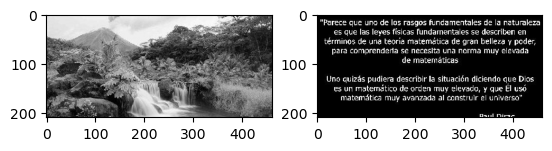

In [3]:
import cv2 as cv
from matplotlib import pyplot as plt

imgf = cv.imread(path+"paisaje_foto.jpeg")
imgt = cv.imread(path+"paisaje_texto.jpeg")
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(imgf)
ax2.imshow(imgt)

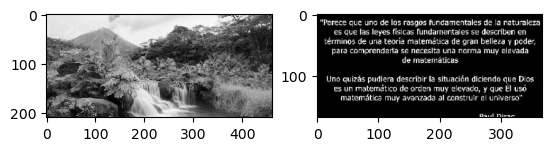

In [4]:
dist = cv.resize(imgt,(int(imgt.shape[1]/1.25),int(imgt.shape[0]/1.25)),cv.INTER_CUBIC)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(imgf)
ax2.imshow(dist)

# **Juntar foto con texto**

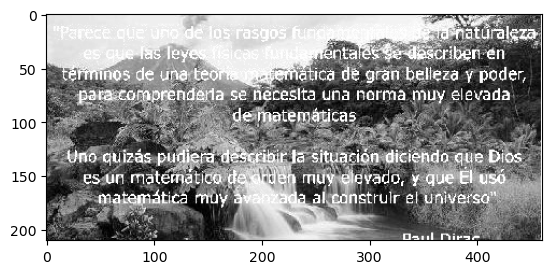

In [5]:
imgtotal = cv.bitwise_or(imgf,imgt)
plt.imshow(imgtotal)

# **Rescatar imagen original**

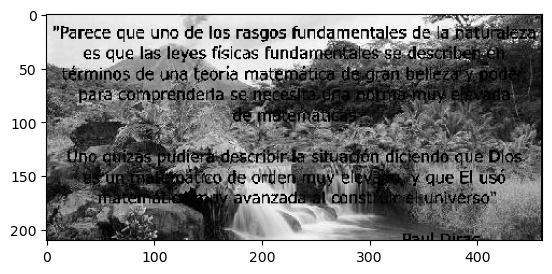

In [6]:
imgtotal2 = cv.bitwise_and(imgf,cv.bitwise_not(imgt))
plt.imshow(imgtotal2)

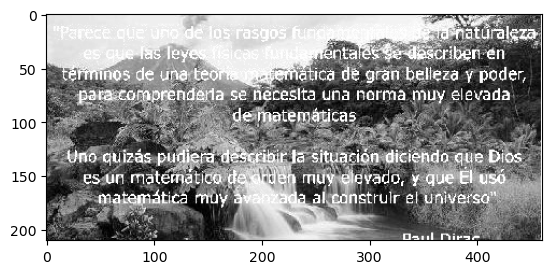

In [7]:
imgtotal = cv.bitwise_or(imgf,(imgt))
plt.imshow(imgtotal)

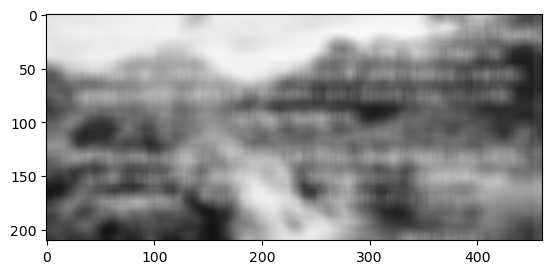

In [8]:

imgtotalDesenfocado = cv.GaussianBlur(src=imgtotal, ksize=(15,15), sigmaX=10, sigmaY=10 )
plt.imshow(imgtotalDesenfocado)

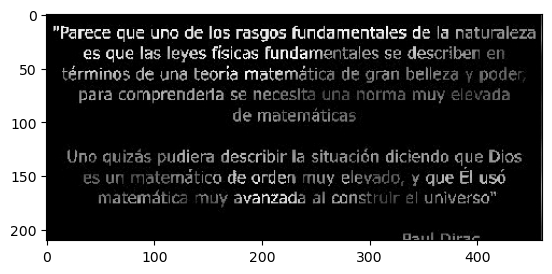

In [9]:

#import numpy as np
#
mascara=cv.bitwise_and(imgtotalDesenfocado,imgt)
#mascara=cv.cvtColor(mascara,cv.COLOR_BGR2GRAY)
#
plt.imshow(mascara,cmap="gray")

# **EJERCICO DE TEXTO A IMAGEN CON SU DISTORSIÓN**

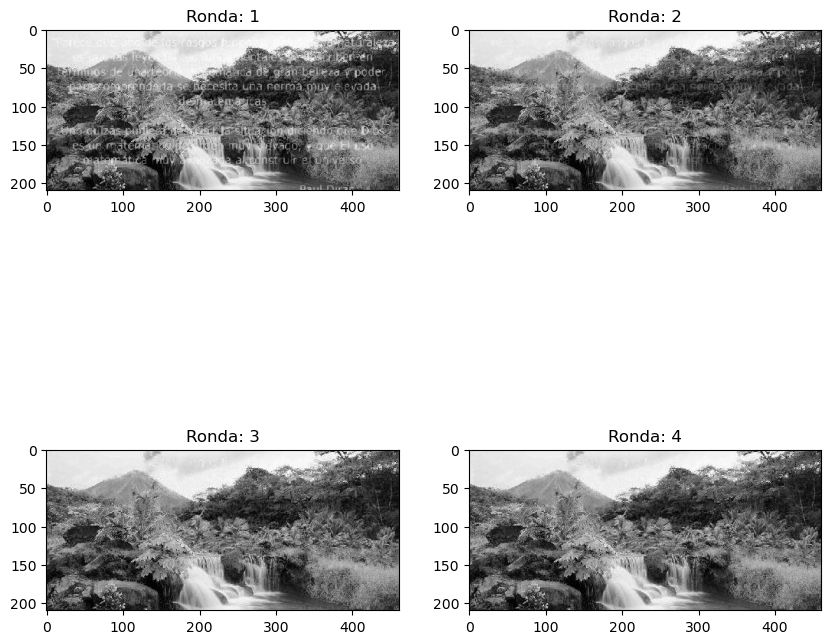

In [11]:
# Tenemos la imagen con las letras
imgtotalBlanco = cv.bitwise_or(imgf,(imgt))
img = imgtotalBlanco

# Creamos cuantas vueltas hará
vueltas = 4
num_cols = vueltas
num_rows = num_cols // 2 if num_cols % 2 == 0 else num_cols // 2 + 1
fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows*5),squeeze=False)

for i in range(vueltas):
    ax = axes[i // 2, i % 2]
    
    # Desenfocamos la imagen
    imgtotalDesenfocado = cv.GaussianBlur(src=img, ksize=(5,5), sigmaX=300, sigmaY=100 )
    
    # Y recogemos sus letras como máscara
    mascara=cv.bitwise_and(imgtotalDesenfocado,imgt)

    # Juntamos las imagenes como OR y repetimos
    img = cv.bitwise_or(imgtotal,mascara)
    ax.set_title(f"Ronda: {i+1}")
    ax.imshow(img)
